# Eric Joshua Vincent C. Reyes
## 2015-07981

# 1.3 Nonlinear fit

In [240]:
import numpy as np
import scipy as scp
from scipy.stats import chi2, norm
from scipy.optimize import curve_fit,minimize
from scipy.special import gammainc, gammaincinv,gamma
import matplotlib.pyplot as plt
import random

In [241]:
#We generate data first
def model(t,a,om,phi,b):
    y = a * np.sin(om*t+phi)* np.exp(-b*t)
    return y
def generate_data(t,N,M,a,om,phi,b):
    y = model(t,a,om,phi,b)
    return y +np.random.normal(scale=0.3,size=N)*0.4



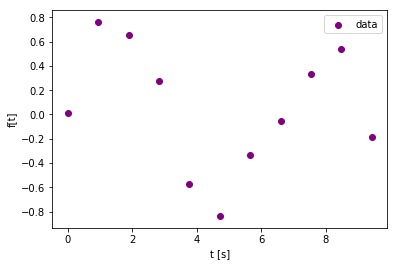

In [242]:
#Then we plot the generated data
N = 11
M = 4
a,om,phi,b = 1,1,0,.1
t = np.linspace(0,3*np.pi,N)
ydata = generate_data(t,N,M,a,om,phi,b)

plt.scatter(t,ydata,label='data',color='purple')
plt.xlabel("t [s]")
plt.ylabel("f[t]")

plt.legend()
plt.savefig("gendata.png",dpi=300)
plt.show()

In [243]:
#After plotting we compute for a fit by minimizing the parameters for chi2 given below.


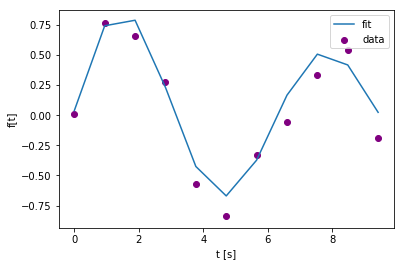

a: 0.9651458999592362
om: 0.9904356603199653
phi: 0.0395570917524922
b: 0.07748664593551677


In [244]:
#The minimization can be obtained with curve_fit which needs a guess for a better fitting of the graph
guess = [1.1, 1.1, 0.1, 0.2]
params,pcov = curve_fit(model,t,ydata,p0=guess)

g = model(t,*params)
sigma_2 = 2/150
xchi_i = ((ydata-g))**2/sigma_2
xchi_i = sum(xchi_i)
#Same data scatter:
plt.scatter(t,ydata,label='data',color='purple')
plt.xlabel("t [s]")
plt.ylabel("f[t]")
#overlaying the fit over the data scatter
plt.plot(t,model(t,*params),label='fit')
plt.legend()
plt.savefig("datawithfit.png",dpi=300)
plt.show()
print("a:",params[0])
print("om:",params[1])
print("phi:",params[2])
print("b:",params[3])

In [245]:
#Now let's say we want to study our fits by using those fitted parameters in generating lots of data

Then, we look at the chisquare whose formula is described below. We get the distribution of the chisquares afterwards.

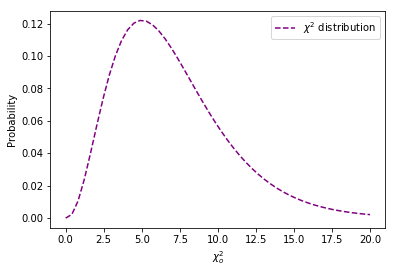

peak of distribution: 1.5446100961709983


In [246]:
#Let's say we have 1000 experiments
collection = np.array([])
a_c = np.array([])
om_c = np.array([])
phi_c = np.array([])
b_c = np.array([])
for i in range(1000):
    N = 11
    M = 4

    t = np.linspace(0,3*np.pi,N)
    trialdata = generate_data(t,N,M,a,om,phi,b)
    if i ==0:
        guess = [1.1, 1.1, 0.1, 0.2]
    else:
        guess = [a_c[i-1],om_c[i-1],phi_c[i-1],b_c[i-1]]
    params,pcov = curve_fit(model,t,trialdata,p0=guess)
    
    a_c = np.append(a_c,params[0])
    om_c = np.append(om_c,params[1])
    phi_c = np.append(phi_c,params[2])
    b_c = np.append(b_c,params[3])
    
    g = model(t,*params)
    sigma_2 = 2/150
    chi_i = ((trialdata-g))**2/sigma_2
    chi_2 = sum(chi_i)
    collection = np.append(collection,chi_2)
    
#e,r,w= plt.hist(collection, normed=True,label = '$\chi^2$ of data histogram')
peak = r[np.where(e==max(e))][0]

x = np.linspace(0,20)
y = chi2.pdf(np.linspace(0,20),7)
plt.plot(x,y,'--', label = '$\chi^2$ distribution',color='purple')

plt.ylabel("Probability")
plt.xlabel("$\chi_o^2$")

plt.legend()
plt.savefig("1000_expt_pdf.png",dpi=300)
plt.show()

print("peak of distribution:",peak)

In [247]:
#To obtain the interval of confidence:
def chi2prob(xo,N,M):
    a = (N-M)/2
    return gammainc(a,xo/2)
def p_inv(y,N,M):
    a = (N-M)/2
    return gammaincinv(a,y)
p_inv(.68,11,7)

2.347711159561496

Chi_o**2		: 15.952763533574272
P_4 (0.68)+Chi_o**2	: 18.30047469313577
P_4 (0.90)+Chi_o**2	: 19.8424837034417


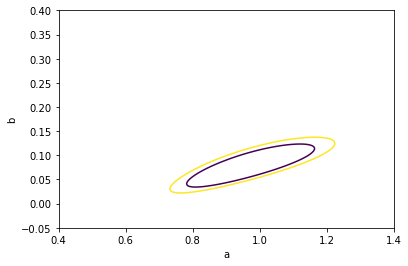

In [252]:
# Now we want to look at the possible values of the parameters a,om,phi,b
#To do that we must look at the contour plots two at a time given that we have 4 parameters to consider

X,Y = np.meshgrid(np.linspace(0.4,1.4,200),np.linspace(-0.05,0.4,200))
#It is important to note that we must get the best parameters for two unused variables before we explore the first two
guess= [1,1,0.1,0.1]
params,pcov = curve_fit(model,t,ydata,p0=[guess])
g = model(t,*params)

chi_i = ((ydata-g))**2/sigma_2
chi_2 = sum(chi_i)
print("Chi_o**2\t\t:",chi_2)
print("P_4 (0.68)+Chi_o**2\t:",(p_inv(0.68,8,4)+chi_2))
print("P_4 (0.90)+Chi_o**2\t:",(p_inv(0.90,8,4)+chi_2))

Z =np.sum([(ydata[i]-model(t[i],X,params[1],params[2],Y))**2/sigma_2 for i in range(N)],axis=0) 
f,ax = plt.subplots(1)
CS = ax.contour(X,Y,Z,levels=[np.linspace(p_inv(0.68,8,4)+chi_2,(p_inv(0.90,8,4)+chi_2),2)])
# ax.clabel(CS, inline=1,fontsize=10)


# plt.scatter(a_c,b_c)

plt.ylabel("b")
plt.xlabel("a")
plt.savefig("ab-contour",dpi=300)
plt.show()

Chi_o**2		: 15.952763533583516
P_4 (0.68)+Chi_o**2	: 18.300474693145013
P_4 (0.90)+Chi_o**2	: 19.842483703450945


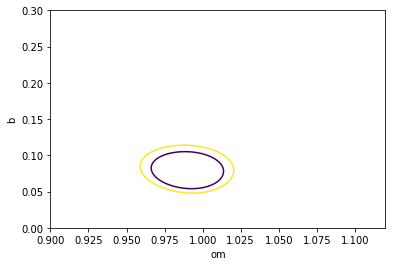

In [253]:
# Now we want to look at the possible values of the parameters a,om,phi,b
#To do that we must look at the contour plots two at a time given that we have 4 parameters to consider

X,Y = np.meshgrid(np.linspace(0.9,1.12,200),np.linspace(0,0.3,200))
#It is important to note that we must get the best parameters for two unused variables before we explore the first two
guess= [1.1,1.1,0.1,0.2]
params,pcov = curve_fit(model,t,ydata,p0=[guess])
g = model(t,*params)

chi_i = ((ydata-g))**2/sigma_2
chi_2 = sum(chi_i)
print("Chi_o**2\t\t:",chi_2)
print("P_4 (0.68)+Chi_o**2\t:",(p_inv(0.68,8,4)+chi_2))
print("P_4 (0.90)+Chi_o**2\t:",(p_inv(0.90,8,4)+chi_2))

Z =np.sum([(ydata[i]-model(t[i],params[0],X,params[2],Y))**2/sigma_2 for i in range(N)],axis=0) 
f,ax = plt.subplots(1)
CS = ax.contour(X,Y,Z,levels=[np.linspace(p_inv(0.68,8,4)+chi_2,(p_inv(0.90,8,4)+chi_2),2)])
# ax.clabel(CS, inline=1,fontsize=10)

plt.ylabel("b")
plt.xlabel("om")
plt.savefig("omb-contour",dpi=300)
plt.show()

Chi_o**2		: 15.952763533583516
P_4 (0.68)+Chi_o**2	: 18.300474693145013
P_4 (0.90)+Chi_o**2	: 19.842483703450945


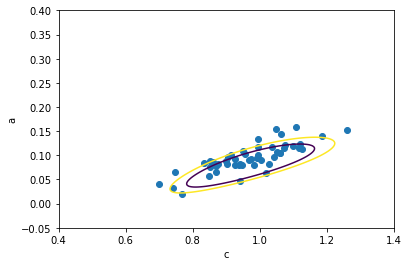

In [258]:
#Now we use an iterative fitting (100 times)
# Now we want to look at the possible values of the parameters a,om,phi,b
#To do that we must look at the contour plots two at a time given that we have 4 parameters to consider

X,Y = np.meshgrid(np.linspace(0.4,1.4,200),np.linspace(-0.05,0.4,200))
#It is important to note that we must get the best parameters for two unused variables before we explore the first two
guess= [1,1,0.1,0.1]
params,pcov = curve_fit(model,t,ydata,p0=[guess])
g = model(t,*params)

chi_i = ((ydata-g))**2/sigma_2
chi_2 = sum(chi_i)
print("Chi_o**2\t\t:",xchi_i)
print("P_4 (0.68)+Chi_o**2\t:",(p_inv(0.68,8,4)+xchi_i))
print("P_4 (0.90)+Chi_o**2\t:",(p_inv(0.90,8,4)+xchi_i))

Z =np.sum([(ydata[i]-model(t[i],X,params[1],params[2],Y))**2/sigma_2 for i in range(N)],axis=0) 

collection = np.array([])
a_c = np.array([])
om_c = np.array([])
phi_c = np.array([])
b_c = np.array([])
for i in range(50):
    N = 11
    M = 4

    t = np.linspace(0,3*np.pi,N)
    trialdata = generate_data(t,N,M,a,om,phi,b)
    if i ==0:
        guess = [1.1, 1.1, 0.1, 0.2]
    else:
        guess = [a_c[i-1],om_c[i-1],phi_c[i-1],b_c[i-1]]
        #guess = [1.1, 1.1, 0.1, 0.2]
    params,pcov = curve_fit(model,t,trialdata,p0=guess)
    
    a_c = np.append(a_c,params[0])
    om_c = np.append(om_c,params[1])
    phi_c = np.append(phi_c,params[2])
    b_c = np.append(b_c,params[3])
    
    g = model(t,*params)
    sigma_2 = 2/150
    chi_i = ((trialdata-g))**2/sigma_2
    chi_2 = sum(chi_i)
    collection = np.append(collection,chi_2)

#And then overlay the generated fits over the contour plots
f,ax = plt.subplots(1)
CS = ax.contour(X,Y,Z,levels=[np.linspace(p_inv(0.68,8,4)+xchi_i,(p_inv(0.90,8,4)+xchi_i),2)])
plt.scatter(a_c,b_c)
plt.ylabel("a")
plt.xlabel("c")
plt.savefig("ac-contour2",dpi=300)
plt.show()

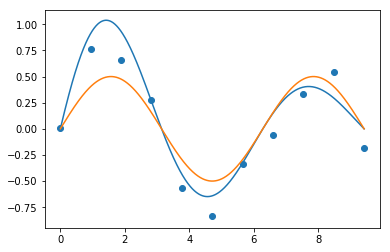

In [260]:
tmodel = np.linspace(0,3*np.pi,1000)
plt.scatter(t,ydata)
plt.plot(tmodel,model(tmodel,1.3,1,0,0.15),label = 'a,om,phi,b=')
plt.plot(tmodel,model(tmodel,0.5,1,0,0))
plt.show()